# OMDENA - LOS ANGELES CHAPTER

# LA OPEN DATA CHALLENGE

# LA Crime Data (2010 : Feb 2023)

##  Overview of Project:

### Challange:

- URL : https://omdena.com/projects/analyzing-open-data-about-los-angeles-metropolitan-area/
- Github: https://github.com/OmdenaAI/la-usa-chapter-open-data
- GSheets: https://docs.google.com/spreadsheets/d/1iagwjFifZ7Q0eKiVTPUBJs1UmeUrX1Z68Xp8Xlyvxr8/edit#gid=0
- Period: Feb - Mar 2023

## Questions covered in this analysis:

- In which day most of the crimes occured?
- In which month most of the crimes occured?
- In which Year most of the crimes occured?
- What were the most occured crimes?
- What was the gender of most affected victims?
- What were the most occured crime with respect to gender?
- In which area most of the crimes occured?
- What was the distribution of crimes by crime area?
- Which weapon used for crime?
- What was the age of victim?
- What was type of crime for victim whose age is less then 20 years old?
- What was type of crime for victim whose age is greater then 60 years old?
- What was the victim descent?
- What was the places where crimes occured?
- What was the status description of crime?

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from warnings import filterwarnings

## Load Data

In [2]:
# data from 2010 t0 2019
df0 = pd.read_csv('crime1.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df0.head()

DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA   \
0    1307355  02/20/2010 12:00:00 AM  02/20/2010 12:00:00 AM      1350     13   
1   11401303  09/13/2010 12:00:00 AM  09/12/2010 12:00:00 AM        45     14   
2   70309629  08/09/2010 12:00:00 AM  08/09/2010 12:00:00 AM      1515     13   
3   90631215  01/05/2010 12:00:00 AM  01/05/2010 12:00:00 AM       150      6   
4  100100501  01/03/2010 12:00:00 AM  01/02/2010 12:00:00 AM      2100      1   

   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0     Newton         1385         2     900   
1    Pacific         1485         2     740   
2     Newton         1324         2     946   
3  Hollywood          646         2     900   
4    Central          176         1     122   

                                         Crm Cd Desc         Mocodes  \
0                           VIOLATION OF COURT ORDER  0913 1814 2000   
1  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...            0329   
2                          OTHER MISCELLANEOUS CRIME            0344   
3                           VIOLATION OF COURT ORDER  1100 0400 1402   
4                                    RAPE, ATTEMPTED            0400   

   Vict Age Vict Sex Vict Descent  Premis Cd             Premis Desc  \
0        48        M            H      501.0  SINGLE FAMILY DWELLING   
1         0        M            W      101.0                  STREET   
2         0        M            H      103.0                   ALLEY   
3        47        F            W      101.0                  STREET   
4        47        F            H      103.0                   ALLEY   

   Weapon Used Cd                                     Weapon Desc Status  \
0             NaN                                             NaN     AA   
1             NaN                                             NaN     IC   
2             NaN                                             NaN     IC   
3           102.0                                        HAND GUN     IC   
4           400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     IC   

    Status Desc  Crm Cd 1  Crm Cd 2  Crm Cd 3  Crm Cd 4  \
0  Adult Arrest     900.0       NaN       NaN       NaN   
1   Invest Cont     740.0       NaN       NaN       NaN   
2   Invest Cont     946.0       NaN       NaN       NaN   
3   Invest Cont     900.0     998.0       NaN       NaN   
4   Invest Cont     122.0       NaN       NaN       NaN   

                                  LOCATION                     Cross Street  \
0   300 E  GAGE                         AV                              NaN   
1          SEPULVEDA                    BL  MANCHESTER                   AV   
2  1300 E  21ST                         ST                              NaN   
3          CAHUENGA                     BL  HOLLYWOOD                    BL   
4          8TH                          ST  SAN PEDRO                    ST   

       LAT       LON  
0  33.9825 -118.2695  
1  33.9599 -118.3962  
2  34.0224 -118.2524  
3  34.1016 -118.3295  
4  34.0387 -118.2488

In [3]:
print(f"Data Shape--->{df0.shape}")

Data Shape--->(2119797, 28)


In [53]:
# data from 2020 to present
df1 = pd.read_csv('crime2.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df1.head()

C:\Users\FINE COMPUTERS\AppData\Local\Temp\ipykernel_6720\3602710279.py:2: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM    2230.0   3.0   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM     330.0   1.0   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM    1200.0   1.0   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM    1730.0  15.0   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM     415.0  19.0   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest        377.0       2.0   624.0   
1      Central        163.0       2.0   624.0   
2      Central        155.0       2.0   845.0   
3  N Hollywood       1543.0       2.0   745.0   
4      Mission       1998.0       2.0   740.0   

                                         Crm Cd Desc         Mocodes  \
0                           BATTERY - SIMPLE ASSAULT       0444 0913   
1                           BATTERY - SIMPLE ASSAULT  0416 1822 1414   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE            1501   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)       0329 1402   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...            0329   

   Vict Age Vict Sex Vict Descent  Premis Cd  \
0      36.0        F            B      501.0   
1      25.0        M            H      102.0   
2       0.0        X            X      726.0   
3      76.0        F            W      502.0   
4      31.0        X            X      409.0   

                                    Premis Desc  Weapon Used Cd  \
0                        SINGLE FAMILY DWELLING           400.0   
1                                      SIDEWALK           500.0   
2                               POLICE FACILITY             NaN   
3  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)             NaN   
4                           BEAUTY SUPPLY STORE             NaN   

                                      Weapon Desc Status   Status Desc  \
0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO   Adult Other   
1                     UNKNOWN WEAPON/OTHER WEAPON     IC   Invest Cont   
2                                             NaN     AA  Adult Arrest   
3                                             NaN     IC   Invest Cont   
4                                             NaN     IC   Invest Cont   

   Crm Cd 1  Crm Cd 2  Crm Cd 3  Crm Cd 4  \
0     624.0       NaN       NaN       NaN   
1     624.0       NaN       NaN       NaN   
2     845.0       NaN       NaN       NaN   
3     745.0     998.0       NaN       NaN   
4     740.0       NaN       NaN       NaN   

                                   LOCATION Cross Street      LAT       LON  
0   1100 W  39TH                         PL          NaN  34.0141 -118.2978  
1    700 S  HILL                         ST          NaN  34.0459 -118.2545  
2    200 E  6TH                          ST          NaN  34.0448 -118.2474  
3   5400    CORTEEN                      PL          NaN  34.1685 -118.4019  
4  14400    TITUS                        ST          NaN  34.2198 -118.4468

In [5]:
print(f"Data Shape--->{df1.shape}")

Data Shape--->(613337, 28)


# Data Integration

In [6]:
df = pd.concat([df0, df1], axis=0)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA   \
0    1307355  02/20/2010 12:00:00 AM  02/20/2010 12:00:00 AM    1350.0   13.0   
1   11401303  09/13/2010 12:00:00 AM  09/12/2010 12:00:00 AM      45.0   14.0   
2   70309629  08/09/2010 12:00:00 AM  08/09/2010 12:00:00 AM    1515.0   13.0   
3   90631215  01/05/2010 12:00:00 AM  01/05/2010 12:00:00 AM     150.0    6.0   
4  100100501  01/03/2010 12:00:00 AM  01/02/2010 12:00:00 AM    2100.0    1.0   

   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0     Newton       1385.0       2.0   900.0   
1    Pacific       1485.0       2.0   740.0   
2     Newton       1324.0       2.0   946.0   
3  Hollywood        646.0       2.0   900.0   
4    Central        176.0       1.0   122.0   

                                         Crm Cd Desc         Mocodes  \
0                           VIOLATION OF COURT ORDER  0913 1814 2000   
1  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...            0329   
2                          OTHER MISCELLANEOUS CRIME            0344   
3                           VIOLATION OF COURT ORDER  1100 0400 1402   
4                                    RAPE, ATTEMPTED            0400   

   Vict Age Vict Sex Vict Descent  Premis Cd             Premis Desc  \
0      48.0        M            H      501.0  SINGLE FAMILY DWELLING   
1       0.0        M            W      101.0                  STREET   
2       0.0        M            H      103.0                   ALLEY   
3      47.0        F            W      101.0                  STREET   
4      47.0        F            H      103.0                   ALLEY   

   Weapon Used Cd                                     Weapon Desc Status  \
0             NaN                                             NaN     AA   
1             NaN                                             NaN     IC   
2             NaN                                             NaN     IC   
3           102.0                                        HAND GUN     IC   
4           400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     IC   

    Status Desc  Crm Cd 1  Crm Cd 2  Crm Cd 3  Crm Cd 4  \
0  Adult Arrest     900.0       NaN       NaN       NaN   
1   Invest Cont     740.0       NaN       NaN       NaN   
2   Invest Cont     946.0       NaN       NaN       NaN   
3   Invest Cont     900.0     998.0       NaN       NaN   
4   Invest Cont     122.0       NaN       NaN       NaN   

                                  LOCATION                     Cross Street  \
0   300 E  GAGE                         AV                              NaN   
1          SEPULVEDA                    BL  MANCHESTER                   AV   
2  1300 E  21ST                         ST                              NaN   
3          CAHUENGA                     BL  HOLLYWOOD                    BL   
4          8TH                          ST  SAN PEDRO                    ST   

       LAT       LON  AREA  
0  33.9825 -118.2695   NaN  
1  33.9599 -118.3962   NaN  
2  34.0224 -118.2524   NaN  
3  34.1016 -118.3295   NaN  
4  34.0387 -118.2488   NaN

## Pre-Processing

In [7]:
df['DATE OCC'] = df['DATE OCC'].str.extract(r'(\d{2}/\d{2}/\d{4})') 

In [8]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y')

In [9]:
df['Day'] = df['DATE OCC'].dt.day_name()

In [10]:
df['Month'] = df['DATE OCC'].dt.month_name()

In [11]:
df['Year'] = df['DATE OCC'].dt.year

In [12]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'AREA', 'Day', 'Month', 'Year'],
      dtype='object')

In [13]:
print(f"Data Shape----->{df.shape}")

Data Shape----->(2733134, 32)


In [14]:
print(" Missing Values Analysis ".center(60, '~'),"\n")
print(df.isnull().sum())

~~~~~~~~~~~~~~~~~ Missing Values Analysis ~~~~~~~~~~~~~~~~~~ 

DR_NO                   0
Date Rptd               4
DATE OCC                4
TIME OCC                5
AREA               613337
AREA NAME               5
Rpt Dist No             5
Part 1-2                5
Crm Cd                  5
Crm Cd Desc             5
Mocodes            312681
Vict Age                5
Vict Sex           277118
Vict Descent       277168
Premis Cd              66
Premis Desc           484
Weapon Used Cd    1805863
Weapon Desc       1805864
Status                  8
Status Desc             5
Crm Cd 1               22
Crm Cd 2          2546247
Crm Cd 3          2728025
Crm Cd 4          2732983
LOCATION                5
Cross Street      2275979
LAT                     5
LON                     5
AREA              2119802
Day                     4
Month                   4
Year                    4
dtype: int64


In [15]:
print(" Information of Data ".center(60, '~'),"\n")
print(df.info())

~~~~~~~~~~~~~~~~~~~ Information of Data ~~~~~~~~~~~~~~~~~~~~ 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2733134 entries, 0 to 613336
Data columns (total 32 columns):
 #   Column          Dtype         
---  ------          -----         
 0   DR_NO           object        
 1   Date Rptd       object        
 2   DATE OCC        datetime64[ns]
 3   TIME OCC        float64       
 4   AREA            float64       
 5   AREA NAME       object        
 6   Rpt Dist No     float64       
 7   Part 1-2        float64       
 8   Crm Cd          float64       
 9   Crm Cd Desc     object        
 10  Mocodes         object        
 11  Vict Age        float64       
 12  Vict Sex        object        
 13  Vict Descent    object        
 14  Premis Cd       float64       
 15  Premis Desc     object        
 16  Weapon Used Cd  float64       
 17  Weapon Desc     object        
 18  Status          object        
 19  Status Desc     object        
 20  Crm Cd 1        float64     

In [16]:
def grab_col_names(df, cat_th=10, car_th=20):
     
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
    num_but_cat = [col for col in df.columns if df[col].nunique() < cat_th and
                   df[col].dtypes != "O"]
    cat_but_car = [col for col in df.columns if df[col].nunique() > car_th and
                   df[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in df.columns if df[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(" RESULT ".center(60, '~'),"\n")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}',"\n")
    print("".center(60, '~'))

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~ RESULT ~~~~~~~~~~~~~~~~~~~~~~~~~~ 

cat_cols: 7
num_cols: 16
cat_but_car: 9
num_but_cat: 1 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [17]:
def check_classes(df):  
    dict = {}
    for i in list(df.columns):
        dict[i] = df[i].value_counts().shape[0]

    unq = pd.DataFrame(dict,index=["Unique Count"]).transpose().sort_values(by="Unique Count", ascending=False)
    return unq
check_classes(df)

Unique Count
DR_NO                2733134
Mocodes               669869
LOCATION               81920
Cross Street           14822
LAT                     5688
LON                     5147
Date Rptd               4792
DATE OCC                4748
TIME OCC                1439
Rpt Dist No             1311
Premis Cd                325
Premis Desc              320
Crm Cd 1                 149
Crm Cd 2                 145
Crm Cd Desc              143
Crm Cd                   143
Vict Age                 113
Weapon Used Cd            80
Weapon Desc               79
Crm Cd 3                  67
AREA NAME                 21
AREA                      21
AREA                      21
Vict Descent              20
Year                      13
Crm Cd 4                  12
Month                     12
Status                     9
Day                        7
Status Desc                6
Vict Sex                   6
Part 1-2                   2

## Data Analysis

In [18]:
print(" Descriptive Statistics ".center(60, '~'),"\n")
df.describe().T

~~~~~~~~~~~~~~~~~~ Descriptive Statistics ~~~~~~~~~~~~~~~~~~ 



count         mean         std        min        25%  \
TIME OCC        2733129.0  1354.027750  648.845633     1.0000   920.0000   
AREA            2119797.0    11.087513    6.012365     1.0000     6.0000   
Rpt Dist No     2733129.0  1147.160360  603.050154   100.0000   638.0000   
Part 1-2        2733129.0     1.439749    0.496357     1.0000     1.0000   
Crm Cd          2733129.0   506.126342  210.191330   110.0000   330.0000   
Vict Age        2733129.0    31.366397   20.894164   -11.0000    19.0000   
Premis Cd       2733068.0   309.733148  212.540127   101.0000   102.0000   
Weapon Used Cd   927271.0   369.259089  115.910945   101.0000   400.0000   
Crm Cd 1        2733112.0   505.928861  210.035958   110.0000   330.0000   
Crm Cd 2         186887.0   950.763049  122.965566   122.0000   998.0000   
Crm Cd 3           5109.0   975.445880   77.226323    93.0000   998.0000   
Crm Cd 4            151.0   979.688742   69.794191   421.0000   998.0000   
LAT             2733129.0    34.037647    1.166105     0.0000    34.0109   
LON             2733129.0  -118.220575    4.031806  -118.8279  -118.4350   
AREA             613332.0    10.732426    6.084315     1.0000     6.0000   
Year            2733130.0  2016.060921    3.699953  2010.0000  2013.0000   

                      50%        75%        max  
TIME OCC        1430.0000  1900.0000  2359.0000  
AREA              11.0000    16.0000    21.0000  
Rpt Dist No     1177.0000  1658.0000  2199.0000  
Part 1-2           1.0000     2.0000     2.0000  
Crm Cd           442.0000   626.0000   956.0000  
Vict Age          31.0000    46.0000   120.0000  
Premis Cd        210.0000   501.0000   971.0000  
Weapon Used Cd   400.0000   400.0000   516.0000  
Crm Cd 1         442.0000   626.0000   999.0000  
Crm Cd 2         998.0000   998.0000   999.0000  
Crm Cd 3         998.0000   998.0000   999.0000  
Crm Cd 4         998.0000   998.0000   999.0000  
LAT               34.0617    34.1722    34.7907  
LON             -118.3279  -118.2768     0.0000  
AREA              11.0000    16.0000    21.0000  
Year            2016.0000  2019.0000  2022.0000

# Crime by day

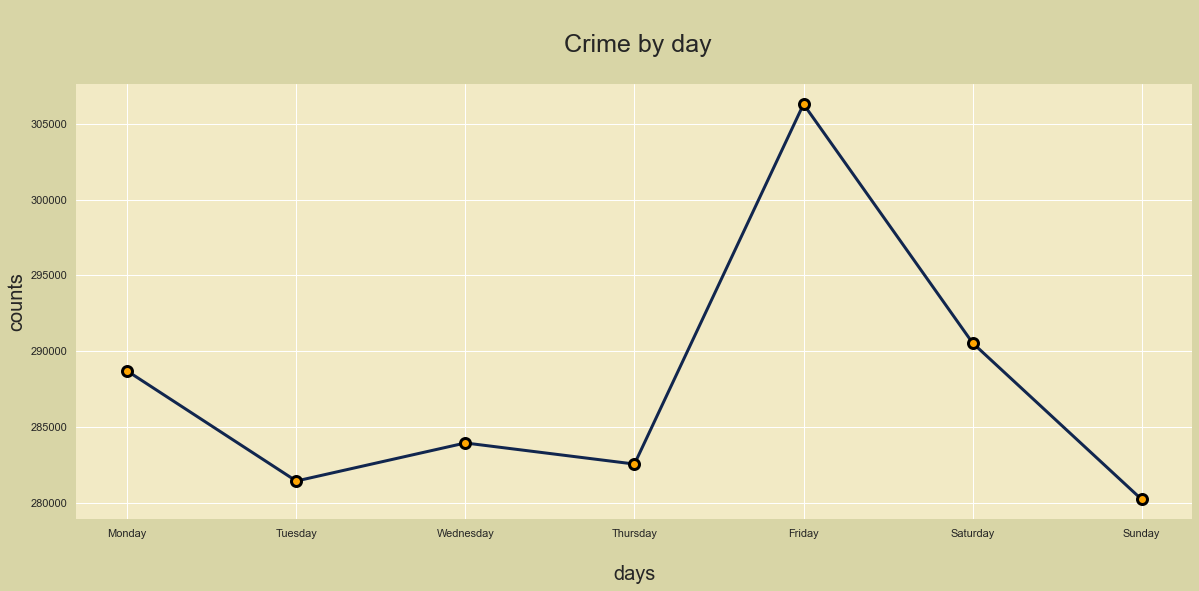

In [43]:
df['Day'].value_counts()
dfg = pd.DataFrame({'days':['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], 'counts':[288698,
        281433,283945,282553,306307,290544,280215]})
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#D8D5A6"})
plt.subplots(figsize=(20,8))

p=sns.lineplot(x='days' ,y='counts',data=dfg,color="#11264e",marker="o",linewidth=3,markersize=10,markerfacecolor="orange",markeredgecolor="black",markeredgewidth=3)
p.axes.set_title("\n Crime by day\n",fontsize=25)
p.axes.set_xlabel("\ndays",fontsize=20)
p.axes.set_ylabel("counts",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

# Crime by month

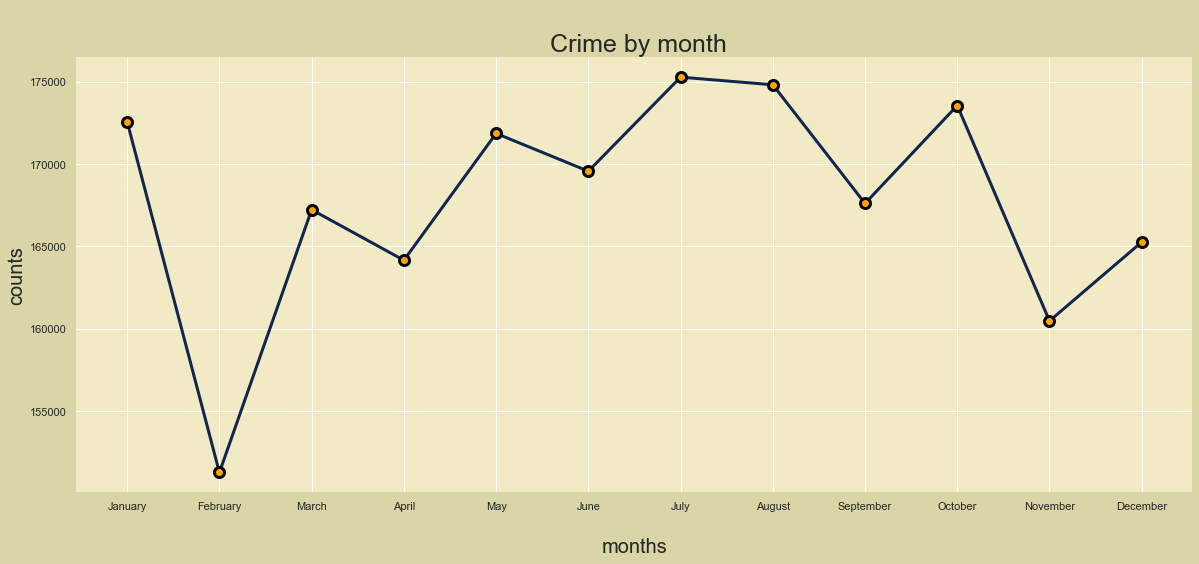

In [44]:
df['Month'].value_counts()
dfg = pd.DataFrame({'month':['January','February','March','April','May','June','July','August','September','October','November','December'], 'counts':[172570,
        151277, 167233,164163,171864,169569,175281,174817,167614,173559,160479,165269]})
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#D8D5A6"})
plt.subplots(figsize=(20,8))

p=sns.lineplot(x='month' ,y='counts',data=dfg,color="#11264e",marker="o",linewidth=3,markersize=10,markerfacecolor="orange",markeredgecolor="black",markeredgewidth=3)
p.axes.set_title("\n Crime by month",fontsize=25)
p.axes.set_xlabel("\nmonths",fontsize=20)
p.axes.set_ylabel("counts",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

##  Crime by year: 2010-2022

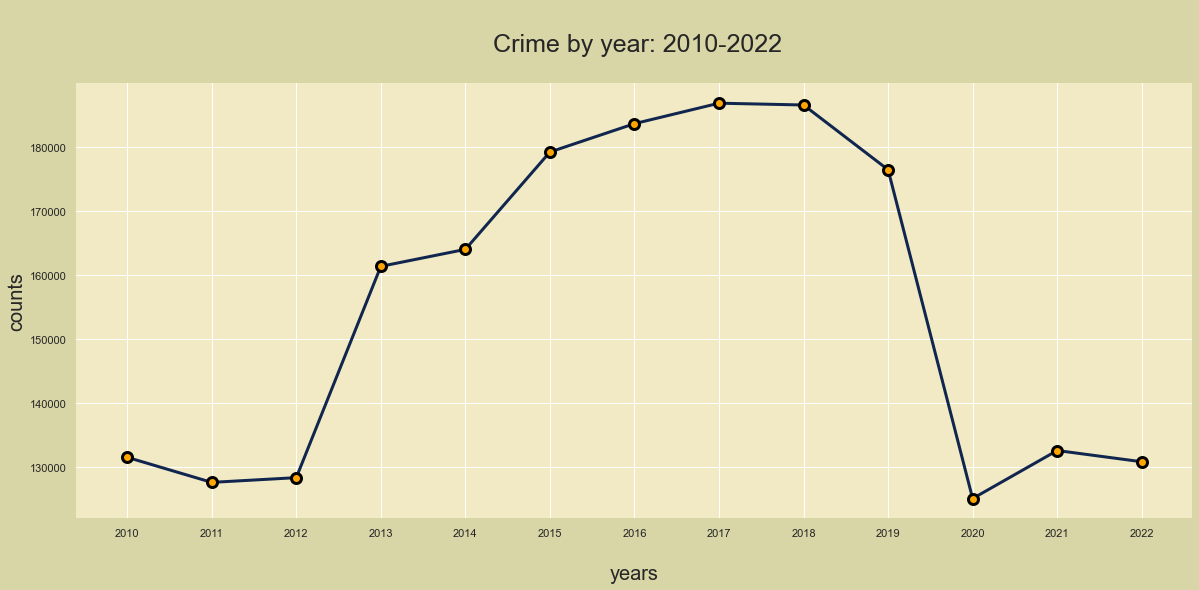

In [48]:
df['Year'].value_counts()

dfg = pd.DataFrame({'years':['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'], 'counts':[131504,
        127588,128326,161324,163976,179181,183610,186807,186525,176416,125065,132563,130810]})
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#D8D5A6"})
plt.subplots(figsize=(20,8))

p=sns.lineplot(x='years' ,y='counts',data=dfg,color="#11264e",marker="o",linewidth=3,markersize=10,markerfacecolor="orange",markeredgecolor="black",markeredgewidth=3)
p.axes.set_title("\n Crime by year: 2010-2022\n",fontsize=25)
p.axes.set_xlabel("\nyears",fontsize=20)
p.axes.set_ylabel("counts",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

## Most occured crimes

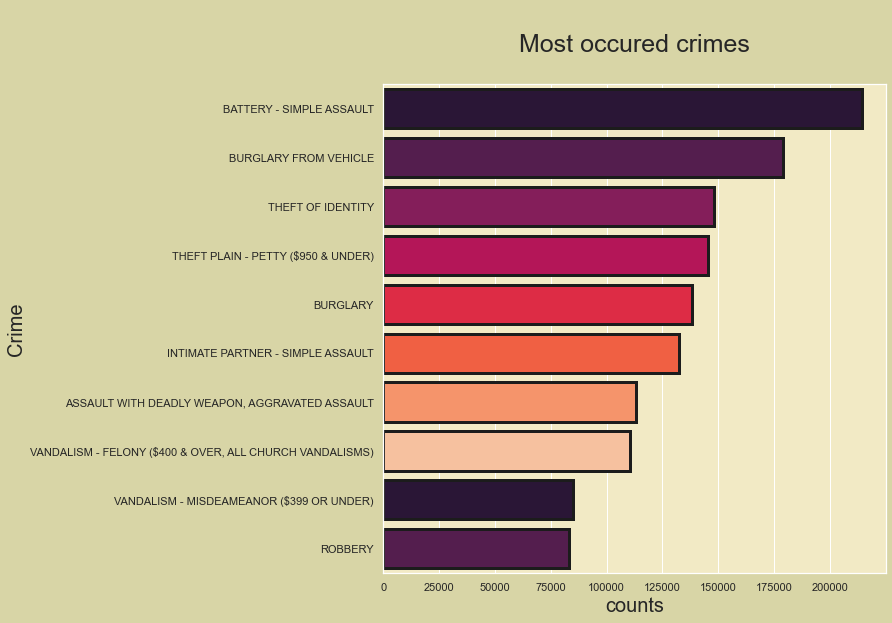

In [46]:
df['Crm Cd Desc'].value_counts()
crime_type = df.groupby('Crm Cd Desc').size().reset_index(name='counts').sort_values(by='counts', ascending=False)
crime_type.head(10)

plt.figure(figsize=(9, 9))

palette = sns.color_palette("rocket", 8)
p=sns.barplot(x='counts',y='Crm Cd Desc', data=crime_type.head(10),palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 3)
p.axes.set_title("\nMost occured crimes\n",fontsize=25)
p.axes.set_xlabel("counts",fontsize=20)
p.axes.set_ylabel("Crime",fontsize=20)
plt.show()

## Gender of victims

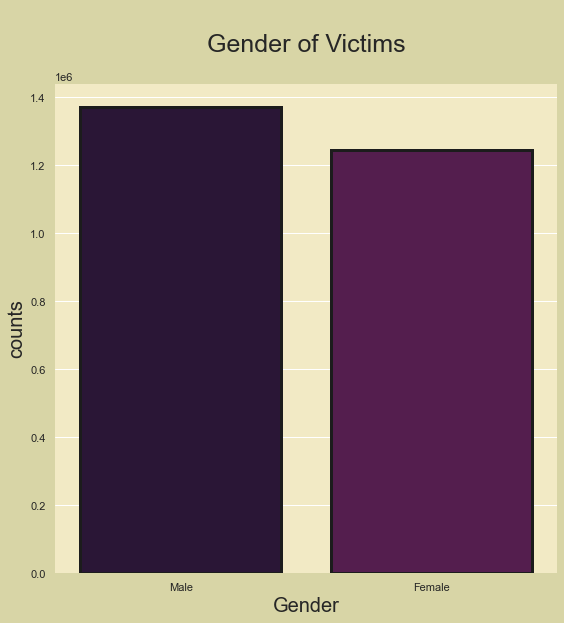

In [23]:
df['Vict Sex'].value_counts()
dfg = pd.DataFrame({'gender':['Male','Female'], 'counts':[1370530,
        1244121]})


plt.figure(figsize=(9, 9))
palette = sns.color_palette("rocket", 8)
p=sns.barplot(y='counts',x='gender', data=dfg,palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 3)
p.axes.set_title("\nGender of Victims\n",fontsize=25)
p.axes.set_xlabel("Gender",fontsize=20)
p.axes.set_ylabel("counts",fontsize=20)
# p.axes.set_xticklabels(p.get_xticklabels(),rotation = 90)
# for container in p.containers:
#     p.bar_label(container,label_type="edge",padding=6,size=24.5,color="black",rotation=0,
#     bbox={"boxstyle": "round", "pad": 0.3, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 2, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

## Most occured crime with respect to gender

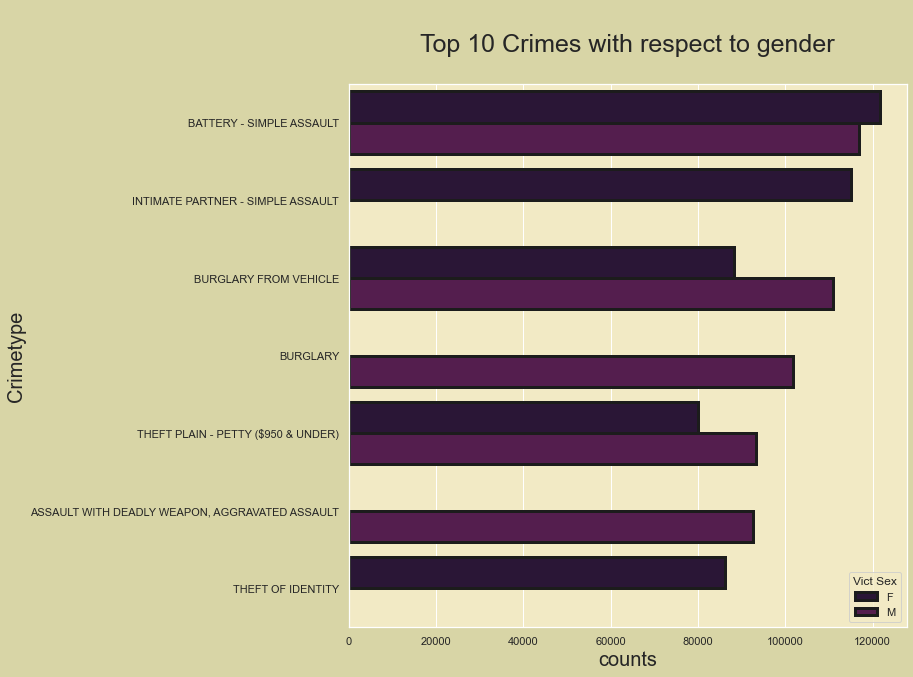

In [24]:
df2 = df.groupby(['Vict Sex','Crm Cd Desc']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)

plt.figure(figsize=(10, 10))

palette = sns.color_palette("rocket", 8)
p=sns.barplot(y='Crm Cd Desc',x = 'counts', data=df2.head(10),palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 3, hue='Vict Sex')
p.axes.set_title("\nTop 10 Crimes with respect to gender\n",fontsize=25)
p.axes.set_xlabel("counts",fontsize=20)
p.axes.set_ylabel("Crimetype",fontsize=20)

plt.show()

# Areas with most occured crime

<Figure size 720x720 with 0 Axes>

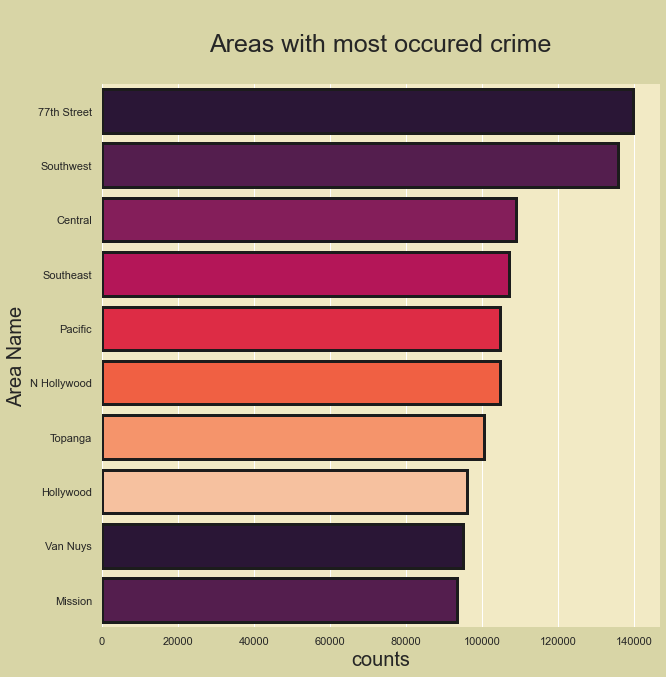

In [49]:
df['AREA NAME'].value_counts()
crime_area = df.groupby('AREA NAME').size().reset_index(name='counts').sort_values(by='counts', ascending=False)
plt.figure(figsize=(10, 10))
plt.figure(figsize=(10, 10))

palette = sns.color_palette("rocket", 8)
p=sns.barplot(y='AREA NAME',x = 'counts', data=crime_area.head(10),palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 3)
p.axes.set_title("\nAreas with most occured crime\n",fontsize=25)
p.axes.set_xlabel("counts",fontsize=20)
p.axes.set_ylabel("Area Name",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

##  Crime distribution by crime area

In [26]:
grouped_data = df.groupby(['AREA NAME', 'Crm Cd Desc']).size().reset_index(name='Frequency')
grouped_data.head(10)

import plotly.express as px


fig = px.bar(grouped_data, x="AREA NAME", y="Frequency", color="Crm Cd Desc",title="Crime Distribution by Crime Area")
fig.show()

## Weapon Used For Crime

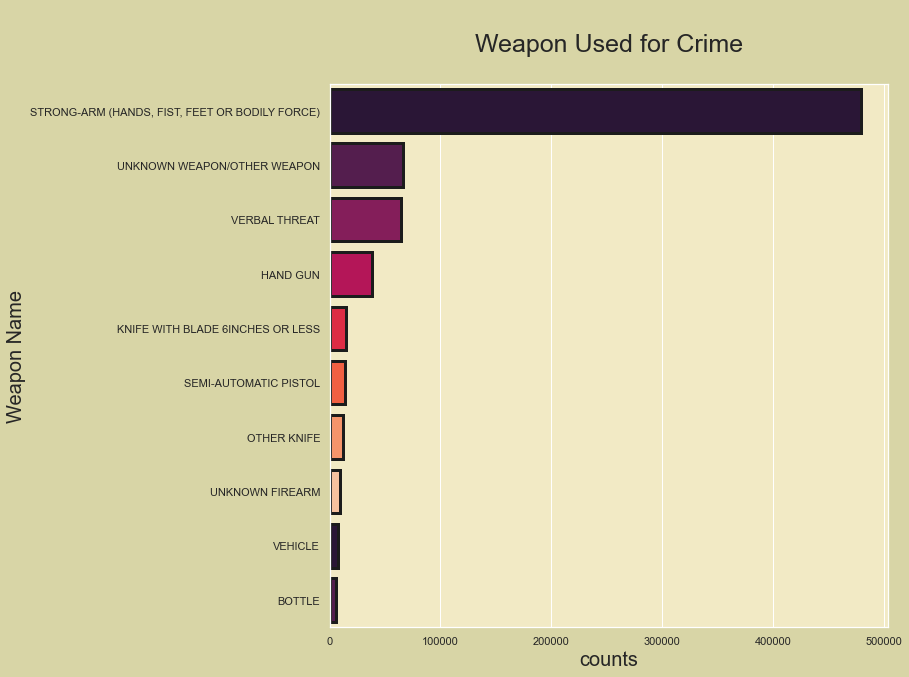

In [50]:
df['Premis Desc'].value_counts()
df['Weapon Desc'].value_counts()
weapon = df.groupby('Weapon Desc').size().reset_index(name='counts').sort_values(by='counts', ascending=False)
plt.figure(figsize=(10, 10))
palette = sns.color_palette("rocket", 8)
p=sns.barplot(x='counts',y='Weapon Desc', data=weapon.head(10),palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 3)
p.axes.set_title("\nWeapon Used for Crime\n",fontsize=25)
p.axes.set_xlabel("counts",fontsize=20)
p.axes.set_ylabel("Weapon Name",fontsize=20)
plt.show()

## Victim by age

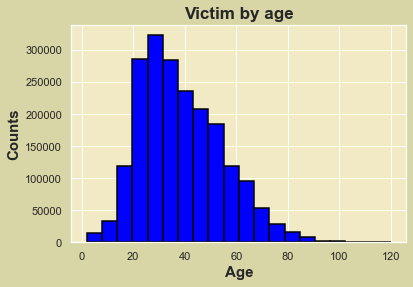

In [28]:
df['Vict Age'].value_counts()
# removing the values ​​below one for the "Vict Age" column
df.drop(df[df['Vict Age'] < 1].index, axis=0, inplace=True)
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#D8D5A6"})
plt.figsize=(10, 10)
plt.hist(df['Vict Age'], bins=20, color='blue', edgecolor='black', linewidth=1.5)
plt.title('Victim by age', fontsize=17, weight='bold')
plt.xlabel('Age', fontsize=15, weight='bold')
plt.ylabel('Counts', fontsize=15, weight='bold')
plt.show()

In [29]:
grouped_data = df.groupby(['Vict Age', 'Crm Cd Desc']).size().reset_index(name='Frequency')
grouped_data.drop(grouped_data[grouped_data['Vict Age'] < 1].index, axis=0, inplace=True)
import plotly.express as px
fig = px.bar(grouped_data[grouped_data['Vict Age'] < 20], x="Vict Age", y="Frequency", color="Crm Cd Desc",title="Crime Types By Victim Less then 20 Years Old")
fig.show()

In [30]:
import plotly.express as px
fig = px.bar(grouped_data[grouped_data['Vict Age'] > 60], x="Vict Age", y="Frequency", color="Crm Cd Desc",title="Crime Types By Victim greater then 60 Years Old")
fig.show()

##  Victim Descent Analysis

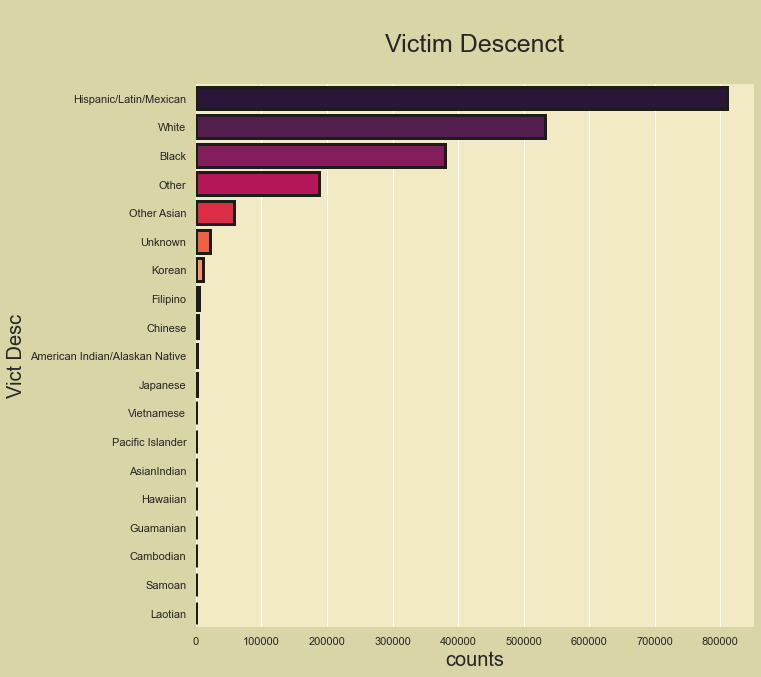

In [37]:
df['Vict Descent'].value_counts()
dfg = pd.DataFrame({'Vict Desc':['Hispanic/Latin/Mexican','White','Black','Other','Other Asian','Unknown','Korean','Filipino','Chinese','American Indian/Alaskan Native','Japanese','Vietnamese','Pacific Islander','AsianIndian','Hawaiian','Guamanian','Cambodian','Samoan','Laotian'], 'counts':[811127,
        532424,379490,188337,57975,21990,10764,4403,2808,1312,1053,702,454,373,222,109,55,48,47]})
plt.figure(figsize=(10, 10))

palette = sns.color_palette("rocket", 8)
p=sns.barplot(x='counts',y='Vict Desc', data=dfg,palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 3)
p.axes.set_title("\nVictim Descenct\n",fontsize=25)
p.axes.set_xlabel("counts",fontsize=20)
p.axes.set_ylabel("Vict Desc",fontsize=20)


sns.despine(left=True, bottom=True)
plt.show()

## Crimes at different Places

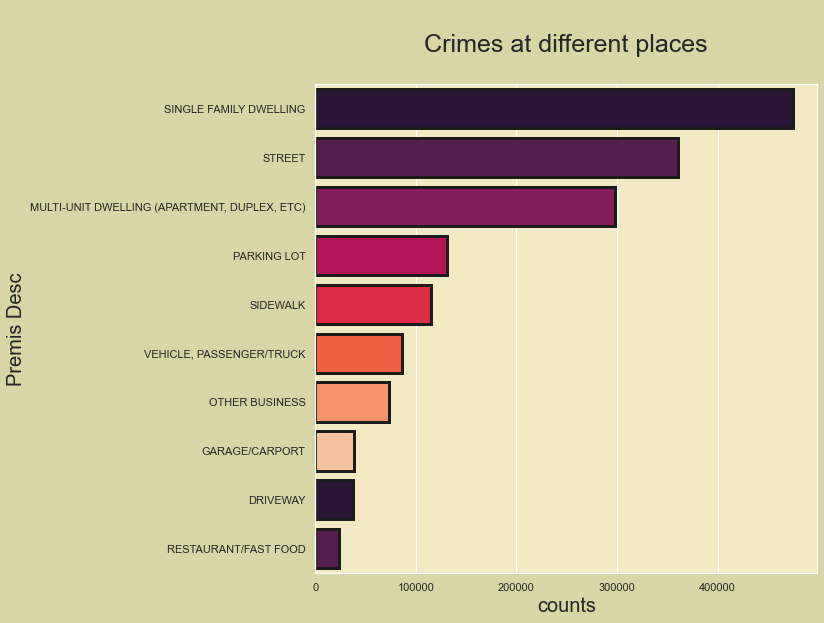

In [51]:
df['Premis Desc'].value_counts()
crime_type = df.groupby('Premis Desc').size().reset_index(name='counts').sort_values(by='counts', ascending=False)
crime_type.head(10)

plt.figure(figsize=(9, 9))

palette = sns.color_palette("rocket", 8)
p=sns.barplot(x='counts',y='Premis Desc', data=crime_type.head(10),palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 3)
p.axes.set_title("\nCrimes at different places\n",fontsize=25)
p.axes.set_xlabel("counts",fontsize=20)
p.axes.set_ylabel("Premis Desc",fontsize=20)
plt.show()

In [52]:
# Status Desc
df['Status Desc'].value_counts()
dfg = pd.DataFrame({'Status Desc':['Invest Cont','Adult Other','Adult Arrest','Juv Arrest','Juv Other','UNK'], 'counts':[1511699,
        277081,205859,13438,5597,25]})
fig = px.pie(dfg, values='counts', names='Status Desc', title='Status Description of Crime',template= 'ggplot2')
fig.show()